In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("train.csv")
df.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [3]:
df.shape

(15120, 56)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

In [5]:
df.isnull().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


In [6]:
# splitting the dataset into features and target variables
x=df.drop('Cover_Type',axis=1)
y=df['Cover_Type']

In [7]:
y.value_counts()

Cover_Type
5    2160
2    2160
1    2160
7    2160
3    2160
6    2160
4    2160
Name: count, dtype: int64

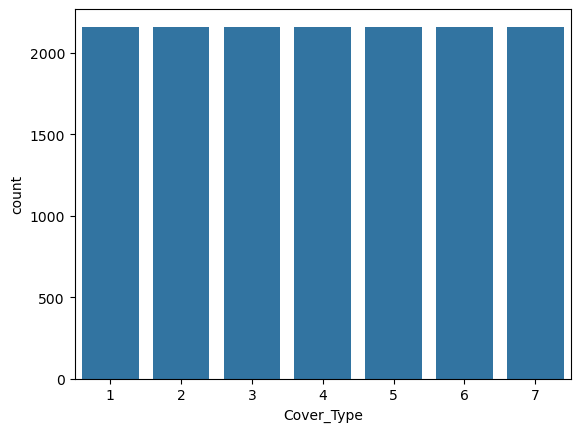

In [8]:
import seaborn as sns
sns.countplot(x='Cover_Type',data=df)
plt.show()

In [9]:
# train the model
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42,stratify=y)

In [10]:
print("X_train:",x_train.shape)
print("X_test:",x_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)

X_train: (11340, 55)
X_test: (3780, 55)
Y_train: (11340,)
Y_test: (3780,)


## Applying Random Forest Classifier

In [12]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [13]:
y_pred=rfc.predict(x_test)
y_pred

array([2, 4, 4, ..., 6, 3, 6], dtype=int64)

In [37]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Confusion matrix:\n",confusion_matrix(y_test,y_pred))
print("Classification report:\n",classification_report(y_test,y_pred))

Accuracy:  0.8687830687830688
Confusion matrix:
 [[427  71   1   0  11   1  29]
 [ 99 368  16   0  33  20   4]
 [  0   1 445  34   6  54   0]
 [  0   0   7 527   0   6   0]
 [  1  12   9   0 513   5   0]
 [  0   3  48  11   2 476   0]
 [ 12   0   0   0   0   0 528]]
Classification report:
               precision    recall  f1-score   support

           1       0.79      0.79      0.79       540
           2       0.81      0.68      0.74       540
           3       0.85      0.82      0.83       540
           4       0.92      0.98      0.95       540
           5       0.91      0.95      0.93       540
           6       0.85      0.88      0.86       540
           7       0.94      0.98      0.96       540

    accuracy                           0.87      3780
   macro avg       0.87      0.87      0.87      3780
weighted avg       0.87      0.87      0.87      3780



In [39]:
df.iloc[15].values

array([  16, 2495,   51,    7,   42,    2,  752,  224,  225,  137, 5576,
          1,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    1,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          5], dtype=int64)

In [41]:
data= (16, 2495,   51,    7,   42,    2,  752,  224,  225,  137, 5576,
          1,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    1,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0)
test_data=np.array([data])
rfc.predict(test_data)

C:\Users\HOME\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([5], dtype=int64)

In [43]:
import pickle
pickle.dump(rfc,open('rfc.pkl','wb'))